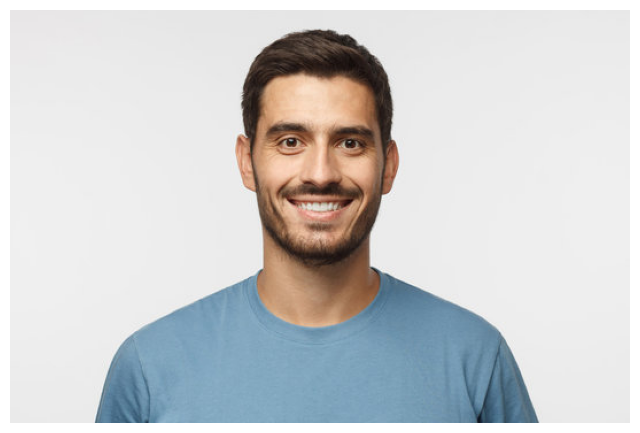

In [56]:
import cv2
import matplotlib.pyplot as plt
 
img = cv2.imread(r"C:\Users\hp\Desktop\detection of the bels palsy\mediapipe\pic1.jpg")
 
fig = plt.figure(figsize = (8, 8))
plt.axis('off')
plt.imshow(img[:, :, ::-1])
plt.show()

In [57]:
mp_face_mesh = mediapipe.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

In [58]:
results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
landmarks = results.multi_face_landmarks[0]

In [68]:
face_oval = mp_face_mesh.FACEMESH_FACE_OVAL
 
import pandas as pd
df = pd.DataFrame(list(face_oval), columns = ["p1", "p2"])


In [69]:
routes_idx = []
 
p1 = df.iloc[0]["p1"]
p2 = df.iloc[0]["p2"]
 
for i in range(0, df.shape[0]):
     
    #print(p1, p2)
     
    obj = df[df["p1"] == p2]
    p1 = obj["p1"].values[0]
    p2 = obj["p2"].values[0]
     
    route_idx = []
    route_idx.append(p1)
    route_idx.append(p2)
    routes_idx.append(route_idx)
 
# -------------------------------
 
for route_idx in routes_idx:
    print(f"Draw a line between {route_idx[0]}th landmark point to {route_idx[1]}th landmark point")

Draw a line between 149th landmark point to 150th landmark point
Draw a line between 150th landmark point to 136th landmark point
Draw a line between 136th landmark point to 172th landmark point
Draw a line between 172th landmark point to 58th landmark point
Draw a line between 58th landmark point to 132th landmark point
Draw a line between 132th landmark point to 93th landmark point
Draw a line between 93th landmark point to 234th landmark point
Draw a line between 234th landmark point to 127th landmark point
Draw a line between 127th landmark point to 162th landmark point
Draw a line between 162th landmark point to 21th landmark point
Draw a line between 21th landmark point to 54th landmark point
Draw a line between 54th landmark point to 103th landmark point
Draw a line between 103th landmark point to 67th landmark point
Draw a line between 67th landmark point to 109th landmark point
Draw a line between 109th landmark point to 10th landmark point
Draw a line between 10th landmark po

In [70]:
routes = []
 
for source_idx, target_idx in routes_idx:
     
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
         
    relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
    relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))
 
    #cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)
     
    routes.append(relative_source)
    routes.append(relative_target)

In [72]:
routes[0:5]

[(243, 204), (236, 199), (236, 199), (228, 192), (228, 192)]

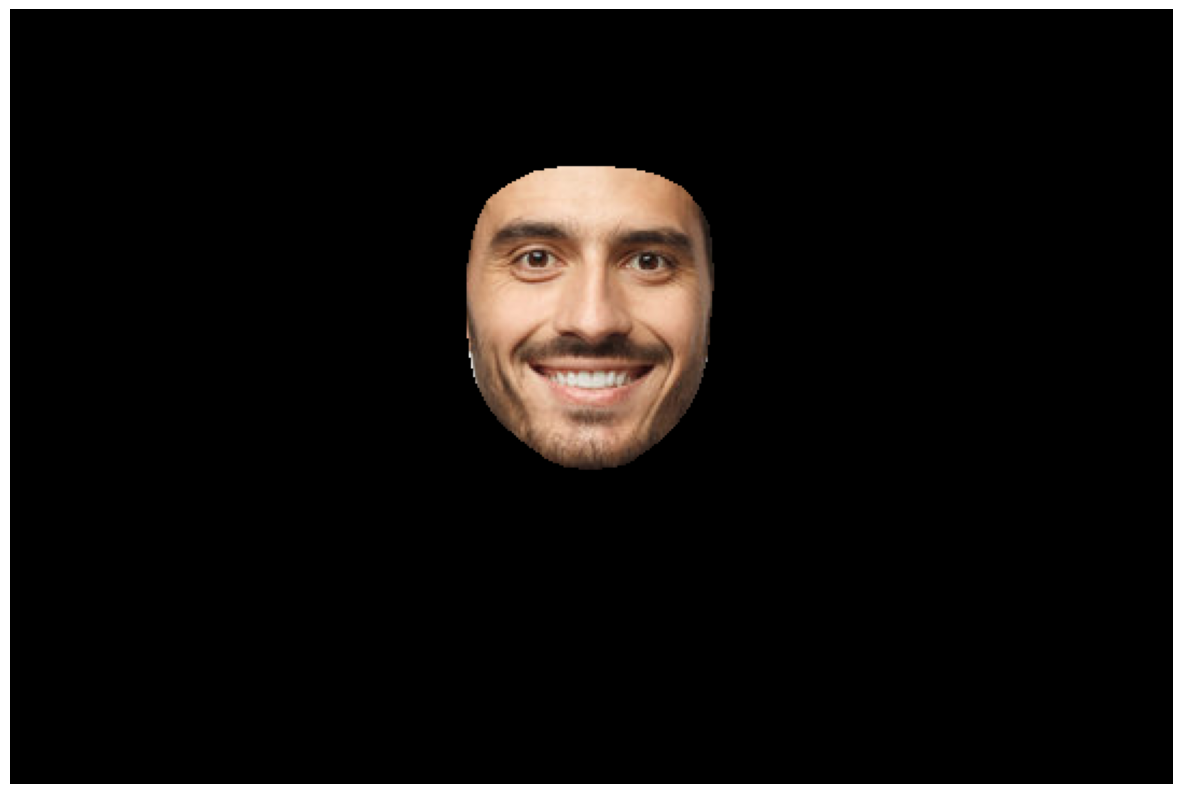

In [71]:
import numpy as np
 
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(bool)
  
out = np.zeros_like(img)
out[mask] = img[mask]
 
fig = plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(out[:, :, ::-1])